In [1]:
!pip install pandas numpy scikit-learn xgboost matplotlib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, callback
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
'''
Setting up Kaggle to load data
  28 cp kaggle.json ~/.kaggle/kaggle.json
  29 & C:/Users/rizwa/anaconda3/envs/Machine_learning/python.exe c:/Users/rizwa/Tech/Github/Data/Machine-Learning/Regres... 
  30 kaggle competitions download -c home-data-for-ml-course
  31 cd ../tech/github/data/machine-learning/
  32 kaggle competitions download -c home-data-for-ml-course
  33 mkdir End_to_end_model
  34 mv Regressor.py End_to_end_model/
  35 rmv home-data-for-ml-course.zip
  36 rm home-data-for-ml-course.zip
  37 cd end_to_end_model
  38 kaggle competitions download -c home-data-for-ml-course
  39 unzip home-data-for-ml-course.zip
  40 Expand-Archive home-data-for-ml-course.zip .
  '''


'\nSetting up Kaggle to load data\n  28 cp kaggle.json ~/.kaggle/kaggle.json\n  29 & C:/Users/rizwa/anaconda3/envs/Machine_learning/python.exe c:/Users/rizwa/Tech/Github/Data/Machine-Learning/Regres... \n  30 kaggle competitions download -c home-data-for-ml-course\n  31 cd ../tech/github/data/machine-learning/\n  32 kaggle competitions download -c home-data-for-ml-course\n  33 mkdir End_to_end_model\n  34 mv Regressor.py End_to_end_model/\n  35 rmv home-data-for-ml-course.zip\n  36 rm home-data-for-ml-course.zip\n  37 cd end_to_end_model\n  38 kaggle competitions download -c home-data-for-ml-course\n  39 unzip home-data-for-ml-course.zip\n  40 Expand-Archive home-data-for-ml-course.zip .\n  '

In [3]:
#loading data
df = pd.read_csv(r'C:\Users\rizwa\Tech\Github\Data\Machine-Learning\End_to_end_model\train.csv')
df.shape                

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
null_cols = df.isnull().sum()[df.isnull().sum() > 0]
null_cols

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
null_cols_perc = (df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0]
null_cols_perc

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:

## Dropping columns with null values exceeding 30%
df = df.loc[:, df.isnull().mean() < 0.3]


In [9]:
null_cols = df.isnull().sum()[df.isnull().sum() > 0]
null_cols

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [10]:
null_cols_perc = (df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0]
null_cols_perc

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [11]:
# Find duplicate rows
duplicates = df[df.duplicated()]
duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
X.shape, y.shape

((1460, 74), (1460,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=2)

In [15]:
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(exclude='object').columns

In [16]:
categorical = Pipeline(steps=[('impute', SimpleImputer(strategy='constant')),
                              ('OHE', OneHotEncoder(handle_unknown='ignore'))])
numerical = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('Scaler', StandardScaler())])

In [17]:
Preprocessor = ColumnTransformer(transformers=[('categorical', categorical, categorical_cols),
                                             ('numerical', numerical, numerical_cols)])

In [18]:
Rf_model = RandomForestRegressor(n_estimators= 300, max_depth= 5, random_state = 2, max_leaf_nodes= 5)

In [19]:
Rf_pipeline = Pipeline(steps = [('Preprocessing', Preprocessor),
                       ('RfR', Rf_model)])

In [20]:
Rf_pipeline.fit(X_train, y_train)

,steps,"[('Preprocessing', ...), ('RfR', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numerical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
Rf_predictions = Rf_pipeline.predict(X_test)
Rf_mae = mean_absolute_error(Rf_predictions, y_test)
Rf_cross_val = cross_val_score(Rf_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
Rf_r2_score = r2_score(Rf_predictions, y_test)
Rf_rmse = np.sqrt(mean_squared_error(y_test, Rf_predictions))
print(f'RandomForestRegressor: MAE is {round(Rf_mae, 2)}, Cross-Validated MAE is {round(-Rf_cross_val, 2)}, R2 score is {round(Rf_r2_score, 3)} and RMSE is {round(Rf_rmse, 2)}')

RandomForestRegressor: MAE is 29526.67, Cross-Validated MAE is 29219.75, R2 score is 0.548 and RMSE is 40851.53


In [22]:
XG_model = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.05, random_state=2)

In [23]:
XG_pipeline = Pipeline(steps= [('Preprocessing', Preprocessor),
                               ('model', XG_model)])

In [24]:
XG_pipeline.fit(X_train, y_train)

,steps,"[('Preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numerical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
XG_predictions = XG_pipeline.predict(X_test)
XG_mae = mean_absolute_error(XG_predictions, y_test)
XG_cross_val = cross_val_score(XG_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
XG_r2_score = r2_score(XG_predictions, y_test)
XG_rmse = np.sqrt(mean_squared_error(y_test, XG_predictions))
print(f'XGBoost: MAE is {round(XG_mae, 2)}, Cross-validated MAE is {round(-XG_cross_val, 2)}, R2 score is {round(XG_r2_score, 3)} and RMSE is {round(XG_rmse, 2)}')

XGBoost: MAE is 17073.3, Cross-validated MAE is 16545.21, R2 score is 0.892 and RMSE is 24919.3


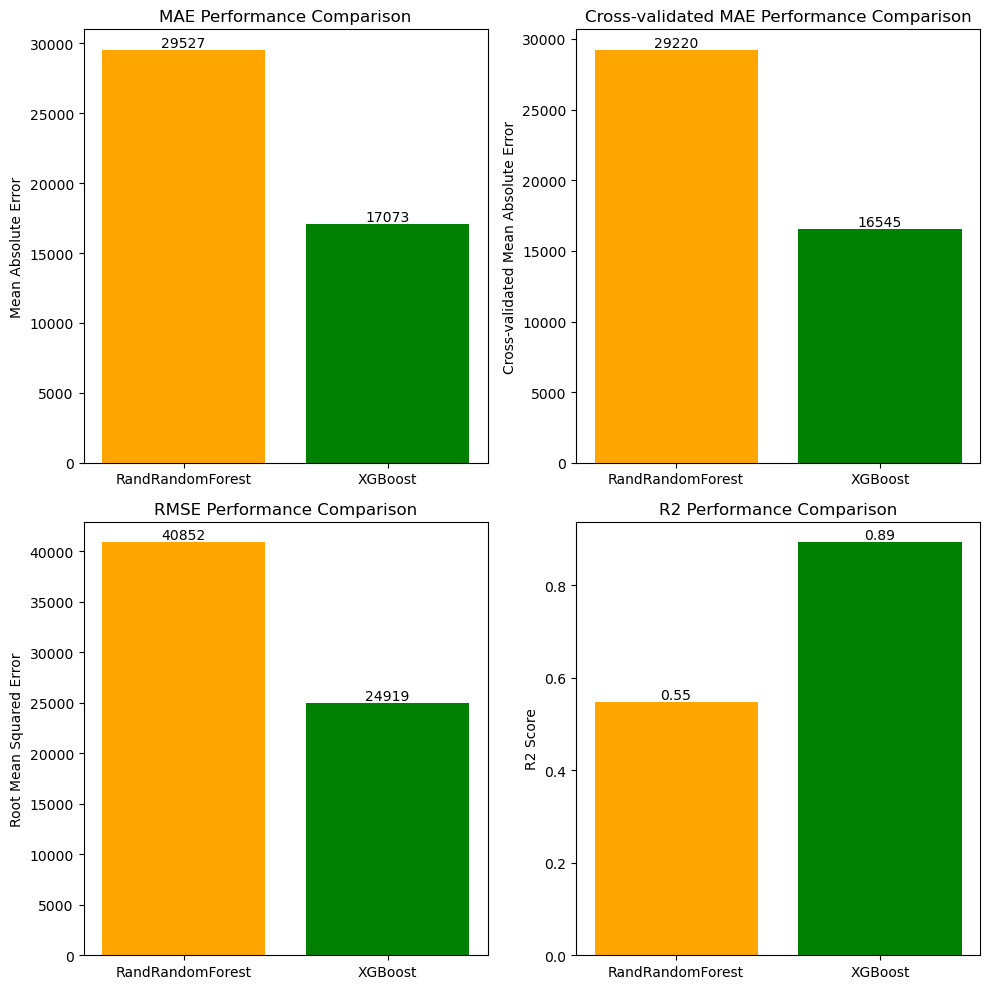

In [26]:
models= ['RandRandomForest', 'XGBoost']
mae_scores= [Rf_mae, XG_mae]
R2_scores = [Rf_r2_score, XG_r2_score]
rmse_scores =[Rf_rmse,XG_rmse]
cross_val_scores = [-Rf_cross_val, -XG_cross_val]

fig, ax = plt.subplots(2, 2, figsize = (10,10))

bars_mae = ax[0,0].bar(models, mae_scores, color = ['orange', 'green'], )
ax[0,0].set_title('MAE Performance Comparison')
ax[0,0].set_ylabel('Mean Absolute Error')
for i in range(len(bars_mae)):
    ax[0,0].text(i, mae_scores[i], f'{mae_scores[i]:.0f}', ha= 'center', va = 'bottom')

bars_cross = ax[0,1].bar(models, cross_val_scores, color = ['orange', 'green'])
ax[0,1].set_title('Cross-validated MAE Performance Comparison')
ax[0,1].set_ylabel('Cross-validated Mean Absolute Error')
for i in range(len(bars_cross)):
    ax[0,1].text(i, cross_val_scores[i], f'{cross_val_scores[i]:.0f}', ha='center', va= 'bottom')

bars_rmse = ax[1,0].bar(models, rmse_scores, color = ['orange', 'green'])
ax[1,0].set_title('RMSE Performance Comparison')
ax[1,0].set_ylabel('Root Mean Squared Error')
for i in range(len(bars_rmse)):
    ax[1,0].text(i, rmse_scores[i], f'{rmse_scores[i]:.0f}', ha= 'center', va = 'bottom')

bars_r2 = ax[1,1].bar(models, R2_scores, color=['orange', 'green'])
ax[1,1].set_title('R2 Performance Comparison')
ax[1,1].set_ylabel('R2 Score')
for i in range(len(bars_r2)):
    ax[1,1].text(i, R2_scores[i], f'{R2_scores[i]:.2f}', ha='center', va= 'bottom')
plt.tight_layout()
plt.show()

In [27]:
# Fine tuning the performance

def evaluate(max_depth: int, n_estimators: int, learning_rate: float, cv_folds: int=10)-> float:
    XG_model_2 = XGBRegressor(max_depth=max_depth,n_estimators=n_estimators, learning_rate=learning_rate, random_state = 2) 
    XG_pipe = Pipeline(steps=[('Preprocessing', Preprocessor),
                              ('model', XG_model_2)])    
    cv_scores = cross_val_score(XG_pipe,
                                X, y,
                                scoring= 'neg_mean_absolute_error',
                                cv = cv_folds,
                                n_jobs=-1)
    avg_mae = cv_scores.mean() * -1
    return avg_mae

In [28]:
max_depth= [3, 5, 7]
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.01, 0.05, 0.1]
best_param = {}
best_mae = float('inf')
for depth in max_depth:
    for estimator in n_estimators:
        for rate in learning_rate:
            avg_mae_score = evaluate(depth, estimator, rate)
            if avg_mae_score < best_mae:
                best_mae = avg_mae_score
                best_param = {'max_depth': depth, 'n_estimators': estimator, 'learning_rate': rate}

print(f'Best parameters: {best_param} with MAE: {best_mae:.2f}')


Best parameters: {'max_depth': 3, 'n_estimators': 400, 'learning_rate': 0.1} with MAE: 15092.94


In [29]:
finalized_model = XGBRegressor(max_depth=best_param['max_depth'],
                                n_estimators=best_param['n_estimators'],
                                learning_rate=best_param['learning_rate'],
                                random_state=2)

In [30]:
final_pipe = Pipeline(steps=[('Preprocessing', Preprocessor),
                              ('model', finalized_model)])

In [31]:
final_pipe.fit(X_train, y_train)

,steps,"[('Preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numerical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
Final_predictions = final_pipe.predict(X_test)
Final_mae = mean_absolute_error(Final_predictions, y_test)
Final_cross_val = cross_val_score(final_pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
Final_r2_score = r2_score(Final_predictions, y_test)
Final_rmse = np.sqrt(mean_squared_error(y_test, Final_predictions))
print(f'Final Model: MAE is {round(Final_mae, 2)}, Cross-Validated MAE is {round(-Final_cross_val, 2)}, R2 score is {round(Final_r2_score, 3)} and RMSE is {round(Final_rmse, 2)}')


Final Model: MAE is 16338.63, Cross-Validated MAE is 16525.77, R2 score is 0.892 and RMSE is 24612.15


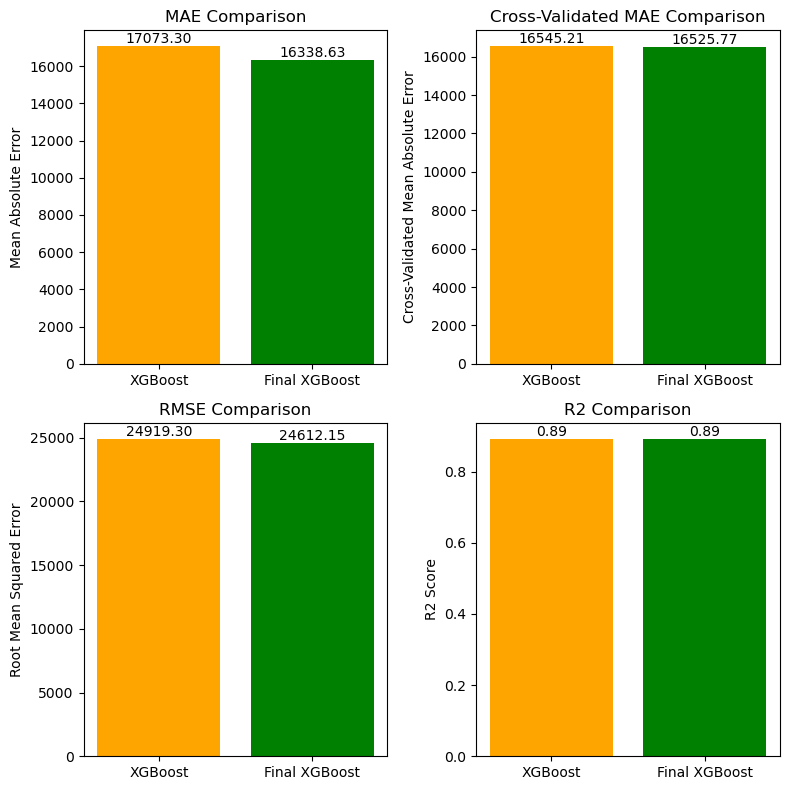

In [49]:
models= ['XGBoost', 'Final XGBoost']
mae= [XG_mae, Final_mae]
cross_val_mae = [-XG_cross_val, -Final_cross_val]
r2_scores = [XG_r2_score, Final_r2_score]
rmse_scores = [XG_rmse, Final_rmse]
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].bar(models, mae, color=['orange', 'green'])
ax[0, 0].set_title('MAE Comparison')
ax[0, 0].set_ylabel('Mean Absolute Error')
for i in range(len(models)):
    ax[0, 0].text(i, mae[i], f'{mae[i]:.2f}', ha='center', va='bottom')

ax[0, 1].bar(models, cross_val_mae, color=['orange', 'green'])
ax[0, 1].set_title('Cross-Validated MAE Comparison')
ax[0, 1].set_ylabel('Cross-Validated Mean Absolute Error')
for i in range(len(models)):
    ax[0, 1].text(i, cross_val_mae[i], f'{cross_val_mae[i]:.2f}', ha='center', va='bottom')

ax[1, 0].bar(models, rmse_scores, color=['orange', 'green'])
ax[1, 0].set_title('RMSE Comparison')
ax[1, 0].set_ylabel('Root Mean Squared Error')
for i in range(len(models)):
    ax[1, 0].text(i, rmse_scores[i], f'{rmse_scores[i]:.2f}', ha='center', va='bottom')

ax[1, 1].bar(models, r2_scores, color=['orange', 'green'])
ax[1, 1].set_title('R2 Comparison')
ax[1, 1].set_ylabel('R2 Score')
for i in range(len(models)):
    ax[1, 1].text(i, r2_scores[i], f'{r2_scores[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [56]:
import pickle
filename = 'final_model.sav'
pickle.dump(final_pipe, open(filename, 'wb'))
final_model = pickle.load(open('final_model.sav', 'rb'))